In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as keras

导入数据

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

数据拆分

In [3]:
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


归一化

In [4]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

显示数据集的数据（与深度学习无关）

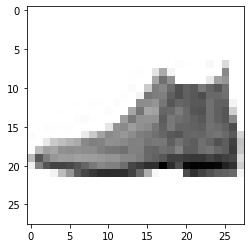

In [5]:
def show_img(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()

show_img(x_test_scaled[0])

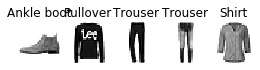

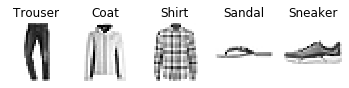

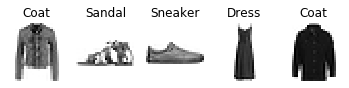

In [6]:
# 行数  列数
def show_imgs(n_cols, n_rows, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize= (n_cols * 1.4, n_rows * 1.6))
    for col in range(n_cols):
        for row in range(n_rows):
            index = n_rows * col + row
            plt.subplot(n_cols, n_rows, index+1)
            plt.imshow(x_data[index], cmap="binary", interpolation="nearest")
            plt.axis("off")
            plt.title(class_names[y_data[index]])
        plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
show_imgs(3, 5, x_test_scaled, y_test, class_names)

构建模型

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape= [28, 28]),
    keras.layers.Dense(256, activation= tf.nn.relu),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dense(10, activation= tf.nn.softmax)
])

model.compile(optimizer= "adam", loss= "sparse_categorical_crossentropy", metrics= ["accuracy"])

训练模型

In [8]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.4568 - accuracy: 0.8333 - val_loss: 0.3700 - val_accuracy: 0.8680
Epoch 2/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.3489 - accuracy: 0.8712 - val_loss: 0.3585 - val_accuracy: 0.8732
Epoch 3/10
55000/55000 [==============================] - 4s 66us/sample - loss: 0.3145 - accuracy: 0.8825 - val_loss: 0.3495 - val_accuracy: 0.8690
Epoch 4/10
55000/55000 [==============================] - 6s 108us/sample - loss: 0.2930 - accuracy: 0.8901 - val_loss: 0.3248 - val_accuracy: 0.8834
Epoch 5/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.2741 - accuracy: 0.8966 - val_loss: 0.3155 - val_accuracy: 0.8894
Epoch 6/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.2570 - accuracy: 0.9028 - val_loss: 0.3201 - val_accuracy: 0.8896
Epoch 7/10
55000/55000 [==============================] 

显示训练过程

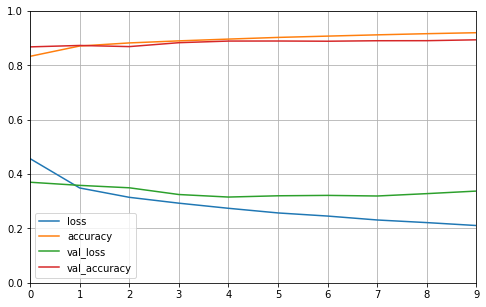

In [9]:
def plot_learnning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learnning_curves(history)

In [10]:
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.36775977943241595, 0.8811]